In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [13]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28, 28, 1)

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
x_train = x_train/255
x_test = x_test/255
print("Shape of Training : ", x_train.shape)
print("Shape of Testing : ", x_test.shape)

Shape of Training :  (60000, 28, 28, 1)
Shape of Testing :  (10000, 28, 28, 1)


In [17]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [18]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2015 - accuracy: 0.9387
Epoch 2/2
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0818 - accuracy: 0.9758


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9815
Loss=0.061
Accuracy=0.982


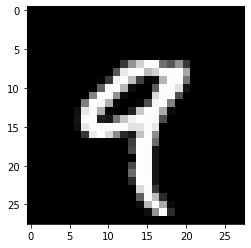

In [20]:
image = x_train[4]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [21]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))

Predicted class: 9
